In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil import parser
from matplotlib import rcParams, style
style.use('ggplot')

In [2]:
df_dust = pd.read_csv('seoul_dust.csv')
df_avg_temp = pd.read_csv('seoul_avgtemp.csv')

In [3]:
df_dust.head()

,Unnamed: 0,dust,micro_dust,oz,NO2,CO,SO3,gu_name
0,1,45,23,0.022,0.034,0.4,0.006,종로
1,2,46,21,0.022,0.037,0.5,0.006,중구
2,3,45,23,0.021,0.035,0.5,0.006,용산
3,4,47,24,0.019,0.039,0.4,0.005,성동
4,5,50,23,0.027,0.028,0.6,0.005,광진


In [4]:
del(df_dust['Unnamed: 0'])

In [5]:
df_dust.head()

,dust,micro_dust,oz,NO2,CO,SO3,gu_name
0,45,23,0.022,0.034,0.4,0.006,종로
1,46,21,0.022,0.037,0.5,0.006,중구
2,45,23,0.021,0.035,0.5,0.006,용산
3,47,24,0.019,0.039,0.4,0.005,성동
4,50,23,0.027,0.028,0.6,0.005,광진


In [6]:
df_avg_temp

,date,종로,강동,강남,동대문,광진,강북,구로,서대문,서초,...,금천,동작,관악,중랑,중구,용산,성동,은평,양천,노원
0,2015-01-28,-3.2,-2.8,-3.4,-3.0,-2.8,-3.1,-3.5,-4.4,-2.6,...,-3.3,-3.1,-3.5,-3.3,-4.3,-3.0,-3.0,-4.4,-3.2,-2.9
1,2015-01-29,0.3,0.1,-0.4,-0.2,0.2,-0.1,-0.2,-0.9,0.6,...,0.0,0.1,-0.1,-0.2,-1.0,0.3,-0.1,-1.0,0.0,-0.1
2,2015-01-30,-1.7,-1.2,-1.8,-1.2,-1.1,-1.5,-1.9,-2.9,-0.9,...,-1.6,-1.5,-2.0,-1.4,-2.8,-1.6,-1.6,-2.7,-1.5,-1.2
3,2015-01-31,-3.4,-2.9,-3.4,-3.0,-2.7,-2.9,-3.5,-4.4,-2.6,...,-3.3,-3.1,-3.7,-3.2,-4.2,-3.2,-3.0,-4.2,-3.1,-2.8
4,2015-02-01,-2.1,-1.6,-2.0,-1.8,-1.5,-1.8,-2.2,-3.2,-1.6,...,-2.2,-1.8,-2.1,-2.0,-3.0,-1.8,-1.6,-3.0,-1.8,-1.9
5,2015-02-02,0.6,0.5,0.1,0.3,0.5,0.4,0.4,-0.6,0.8,...,0.4,0.7,0.4,0.2,-0.6,0.9,0.5,-0.5,0.7,0.3
6,2015-02-03,1.7,1.5,1.1,1.3,1.5,1.6,1.4,0.7,1.6,...,1.1,1.7,1.5,1.3,0.4,1.8,1.4,0.5,1.7,1.2
7,2015-02-04,1.7,1.9,1.6,1.6,2.0,1.9,1.5,0.7,2.0,...,2.8,2.1,1.7,1.7,0.7,2.0,1.8,0.7,2.0,1.6
8,2015-02-05,1.2,1.6,1.1,1.4,1.7,1.6,0.9,0.1,1.8,...,1.0,1.4,0.9,1.3,0.2,1.3,1.5,0.2,1.4,1.6
9,2015-02-06,1.3,1.6,1.1,1.1,1.6,1.4,1.1,0.2,1.5,...,0.9,1.6,1.2,1.2,0.2,1.6,1.5,0.2,1.7,1.2


In [7]:
seoul_list = list(df_avg_temp.columns)

In [8]:
df_avg_temp['광진'].mean()

13.756456456456455

In [9]:
df_dust.head()

,dust,micro_dust,oz,NO2,CO,SO3,gu_name
0,45,23,0.022,0.034,0.4,0.006,종로
1,46,21,0.022,0.037,0.5,0.006,중구
2,45,23,0.021,0.035,0.5,0.006,용산
3,47,24,0.019,0.039,0.4,0.005,성동
4,50,23,0.027,0.028,0.6,0.005,광진


In [10]:
df_dust = df_dust.set_index('gu_name')

In [11]:
df_dust_d = df_dust.sort('dust')
df_dust_d.head()
df_dust_d.plot

/Users/dennisbaek/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


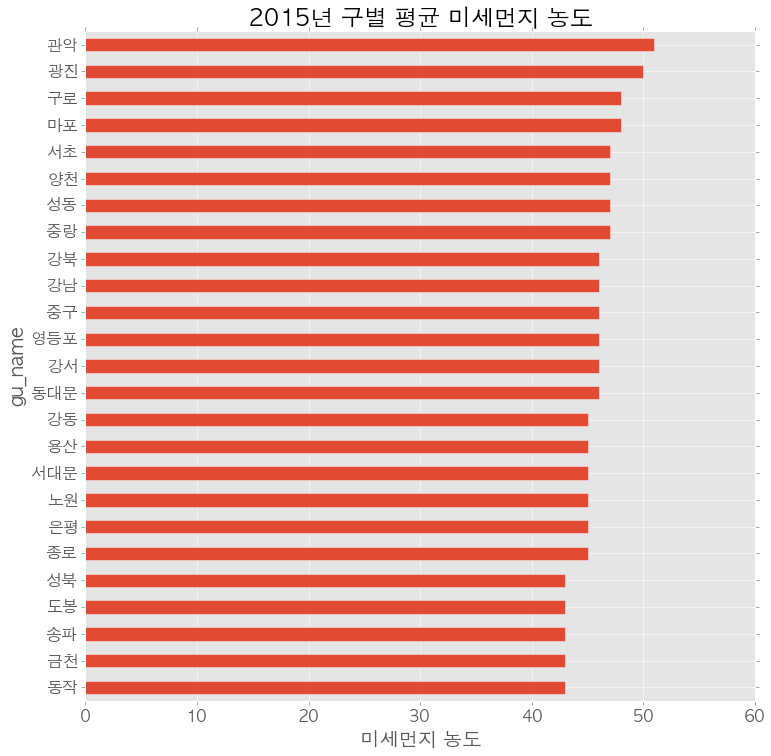

In [15]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=100, facecolor='w', edgecolor='g')

plt.rcParams.update({'font.size': 16})
plt.title('2015년 구별 평균 미세먼지 농도')
plt.ylabel('서울시 구 행정단위')
plt.xlabel('미세먼지 농도')


df_dust_d['dust'].plot(kind='barh')
plt.savefig('dust_graph_2015.png', dpi=500, box_inches='tight')

In [13]:
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=100, facecolor='w', edgecolor='g')

plt.rcParams.update({'font.size': 16})
plt.title('2015년 구별 평균 미세먼지 농도')
plt.ylabel('서울시 구 행정단위')
plt.xlabel('미세먼지 농도')


df_dust['dust'].plot(kind='barh')
plt.savefig('dust_graph_2015.png', dpi=500, box_inches='tight')

In [ ]:
df_rain = pd.read_csv('seoul_rain.csv')

In [ ]:
df_rain = df_rain.set_index('date')

In [ ]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=100, facecolor='w', edgecolor='g')

df_rain.plot()